/home/lejun.min/.conda/envs/my/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


5544


 18%|█▊        | 1001/5544 [00:23<01:48, 41.91it/s]


64128


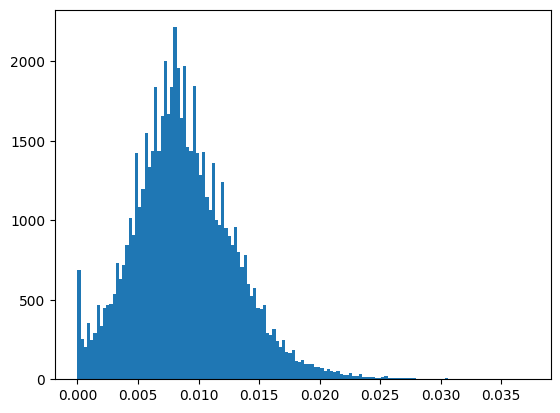

In [1]:
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
from utils import *
from params import params
from dataloader import get_train_val_dataloaders
os.chdir("..")

train_dl, val_dl = get_train_val_dataloaders(64, params)
print(len(train_dl))
density_total = None
for cnt, batch in enumerate(tqdm(train_dl)):
    if cnt > 1000:
        break
    prmat_x, density = batch
    density = np.hstack(density.cpu().numpy())
    if density_total is None:
        density_total = density
    density_total = np.hstack((density_total, density))

print(len(density_total))
_ = plt.hist(np.array(density_total), bins='auto')
plt.show()